In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [2]:
n_round = 52

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [3]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")



payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [4]:
json.dumps(payload)

'{"query": {"round": 52}}'

In [5]:
response

<Response [200]>

In [6]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0xd8e34c552acb166ec5da1d97ca118c522b0289aa',
  'nmse': 3.4140000343,
  'round': 52},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x9ae38c7670a20617b4e4782cb16b3cd786000db8',
  'nmse': 2.2960000038,
  'round': 52},
 {'from_addr': '0x0026f79cadcaca0ce94c52881b1b75dc4951ba91',
  'nft_addr': '0x66abc78216524027b2cab473e58057bc70ec3de5',
  'nmse': 1.6360000372,
  'round': 52},
 {'from_addr': '0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5',
  'nft_addr': '0xc0cc1be55940cf8fbdee89e25fd995955f235aeb',
  'nmse': 3.0650000572,
  'round': 52},
 {'from_addr': '0x00723015a9f5c1db334da1deadb0d935df7cc87b',
  'nft_addr': '0x3ae4074ef5d11bb44c854facd8db4f4983961b23',
  'nmse': 3.4489998817,
  'round': 52},
 {'from_addr': '0x0121478ade27e9ebac45b69666ddd672b838cab5',
  'nft_addr': '0x9c8d7c896b40486ca79f4a683b7a075d33a4824d',
  'nmse': 1.8380000591,
  'round': 52},
 {'from_addr': '0x0139d293b8b74e0d

In [7]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0xd8e34c552acb166ec5da1d97ca118c522b0289aa,3.414000,52
1,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x9ae38c7670a20617b4e4782cb16b3cd786000db8,2.296000,52
2,0x0026f79cadcaca0ce94c52881b1b75dc4951ba91,0x66abc78216524027b2cab473e58057bc70ec3de5,1.636000,52
3,0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5,0xc0cc1be55940cf8fbdee89e25fd995955f235aeb,3.065000,52
4,0x00723015a9f5c1db334da1deadb0d935df7cc87b,0x3ae4074ef5d11bb44c854facd8db4f4983961b23,3.449000,52
...,...,...,...,...
1151,0xfe9758f94d157acc3595aeb36f31bf01cea0c51d,0xa4ea9d1ec1da1ffa6411b4b2992de6f1c2554623,2.153000,52
1152,0xfedc3e5fe3001d7dca6b47e0c2e4885a61a3d062,0xbc383c7d31c90d99c48cb8d21fae9281a40b2a10,82.650002,52
1153,0xff142dd4e4766091cfba78f0342c5ab75388e99a,0xab54acf786ae235cce3fbca6f34c779c6b46e992,3.758000,52
1154,0xff620db01e0c9cca29b7f6e2bcc86da07b55b04a,0x3606c61a80f9fc293da43f4f7b70c21eb5ca9af6,2.322000,52


In [8]:
df = df[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_36313/3112475477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0xc60d7ebf4abfa2d40c3bfb73250daef91cfc9670,0x28252b80c7b177aaff71c4771f2870ce71969563,0.3264,52
1,0x91b2a6def4b7dc5bce6c55ff91d0dfa6aaa05f07,0x15d81a086dd949d2f8421b428a3951ba1629103d,0.3599,52
2,0x09c6af3e0dcb46e24df69f7c2588b6ac1bdc2821,0x15661fc37f03858d499418be6bc4b00bb7e03bf9,0.3843,52
3,0xc2b6fde834e1068b1acaee7f3df29eace2a884e9,0x69d35e3c0839e7c25df0e8e5542974a6ec4bbfec,0.4070,52
4,0xa5287e60f341aea6348fd410db6997ea3aa46971,0xc0f52dd50d30e2f1c9d34bd0e5f00f839ae623e4,0.4569,52
...,...,...,...,...
1119,0x111cb7d9111b1473f3a195c6bafdc4b59c4e6cdb,0xc4ab09f4dbcfa0822265bd48f5d59ac4b82fa1e3,1676.0000,52
1120,0xc9e0c5c92cbd17aeecb5e3e12126f4019d360429,0xc3bf8d4f04910325d84bf51cc920355a8967aaaa,1836.0000,52
1121,0xb1ffcdf428162fd2161bb35438fae0a383947e5d,0xa25d40bb5e92742b19e80f552068cae9bd5a6c7f,2415.0000,52
1122,0x7437c49ec08a2d8eb8eda0bf1bc4a4cac24a3081,0xe4d3c646eb04d27d83451aac6b9c7908e55ead45,2747.0000,52


In [9]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"]

113    1.788
Name: nmse, dtype: float64

In [19]:
df["from_addr"].nunique()

1124

In [11]:
df[(df["nmse"] < 0.99)] 

,from_addr,nft_addr,nmse,round
0,0xc60d7ebf4abfa2d40c3bfb73250daef91cfc9670,0x28252b80c7b177aaff71c4771f2870ce71969563,0.3264,52
1,0x91b2a6def4b7dc5bce6c55ff91d0dfa6aaa05f07,0x15d81a086dd949d2f8421b428a3951ba1629103d,0.3599,52
2,0x09c6af3e0dcb46e24df69f7c2588b6ac1bdc2821,0x15661fc37f03858d499418be6bc4b00bb7e03bf9,0.3843,52
3,0xc2b6fde834e1068b1acaee7f3df29eace2a884e9,0x69d35e3c0839e7c25df0e8e5542974a6ec4bbfec,0.4070,52
4,0xa5287e60f341aea6348fd410db6997ea3aa46971,0xc0f52dd50d30e2f1c9d34bd0e5f00f839ae623e4,0.4569,52
5,0x7670fa7b145e0e81a7834b754cb1cff3a35ad971,0xf9c75c11727d52cc1f15923fce50155cb2d5722e,0.4860,52
6,0x0f0715fc73762526378b032d585c17aaf6e722d1,0xd7fdd2d1b6da5d1a775c0be44081d9559231f6d5,0.4936,52
7,0x2c7fe9d0f1dfc58b03a5774ba558509e43d78ea4,0x899879b2a330ebd508859fc4c40c674589f8267c,0.5212,52
8,0x5f4b622e536e7e1f6f991a4a06cf5f48fe8e5370,0x93b7df1c87ec2572acd851b32a30c7b7a25b55dc,0.5360,52
9,0x2b7723f6e697f79f9ba2befbf8844d2b8c646a54,0xd50fbd91ab94aae2dfe52467e111f3d0f57d799e,0.5615,52


In [12]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

49

In [13]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

32

(0.0, 10.0)

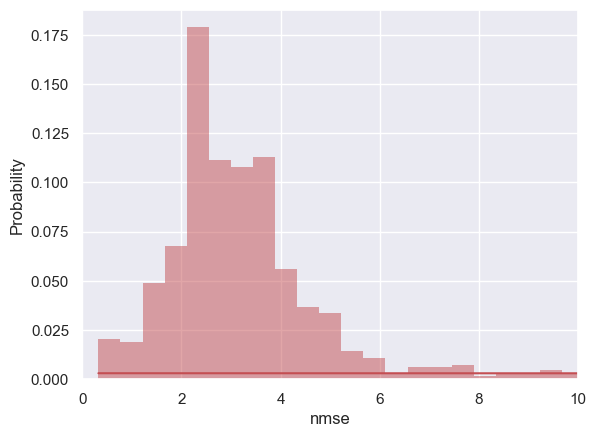

In [14]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [15]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [16]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [17]:
df[(df["nmse"] == 1)].shape[0]

0

In [18]:
df.shape

(1124, 4)